# Esercizio 4

EMBL (https://www.ebi.ac.uk) è una banca di sequenze nucleotidiche sviluppata da EMBL-EBI, che è l'European Bioinformatics Institute dell'European Molecular Biology Laboratory (EMBL),. Ogni sequenza nucleotidica (*entry*) viene memorizzata, con altre informazioni, in un file di puro testo in un formato che prende il nome di `EMBL`.

**Il formato `EMBL`** è composto da *record* a struttura variabile che iniziano con un codice a due lettere maiuscole che ne indica il contenuto. I soli *record* che non iniziano con un codice a due lettere sono quelli contenenti la sequenza nucleotidica.
Il record `//` segnala la fine dell'*entry*.

L'esercizio richiede di leggere il file `M10051.embl` che contiene la sequenza nucleotidica di un mRNA (cioé di un trascritto espresso da un gene). `M10051` è l'identificatore univoco (Accession Number) della sequenza.

Si richiede di produrre, in un file in formato `FASTA`, la sequenza nucleotidica della coding sequence (CDS) separata in *record* di 60 basi.

Inoltre si richiede di determinare:

- le frequenze dei codoni presenti nella CDS, elencate in ordine decrescente
- le frequenze degli amminoacidi presenti nella proteina, elencate in ordine decrescente

Inoltre, preso in input un file `genetic-code.txt` contenente il codice genetico:
- effettuare la validazione della proteina specificata nell'entry `EMBL` rispetto alla sequenza ottenuta per traduzione della sequenza CDS (ottenuta prima)
- trovare una CDS "sinonima" (cioé che produca la stessa proteina) sostituendo il maggior numero possibile di codoni.

***

Requisiti:

- nell’*header* `FASTA` della sequenza della CDS devono comparire l’identificatore univoco della sequenza, l’organismo, la lunghezza della CDS e se la CDS inizia con lo start codon e finisce con lo stop codon, rispettando il formato seguente: 

        >M10051-HUM; len = [length]; start = [yes|no]; end = [yes|no]
        
***

## Indicazioni sul formato `EMBL`

Fare riferimento all'esercizio 3.

## Indicazioni sul file del codice genetico

Il file del codice genetico è strutturato in record di campi separati da `,`, di cui il primo è il simbolo di un amminoacido e i restanti campi sono i codoni che codificano tale amminoacido. L'ultimo record fornisce gli stop codon a cui corrisponde il simbolo `s`.

    A,gct,gcc,gca,gcg
    C,tgt,tgc
    D,gat,gac
    E,gaa,gag
    F,ttt,ttc
    G,ggt,ggc,gga,ggg
    H,cat,cac
    I,att,atc,ata
    K,aaa,aag
    L,tta,ttg,ctt,ctc,cta,ctg
    M,atg
    N,aat,aac
    P,cct,ccc,cca,ccg
    Q,caa,cag
    R,cgt,cgc,cga,cgg,aga,agg
    S,tct,tcc,tca,tcg,agt,agc
    T,act,acc,aca,acg
    V,gtt,gtc,gta,gtg
    W,tgg
    Y,tat,tac
    s,tga,taa,tag
    
***

## Parametri in input

In [50]:
embl_file_name = './M10051.embl'
genetic_code_name = './genetic-code.txt'

## Importare il modulo `re`

In [51]:
import re

## Definire la funzione che formatta una sequenza in `FASTA` 

Fare riferimento all'esercizio 3.

In [52]:
def format_fasta(header, sequence, record = 80):    
    p = re.compile('\w{,' + str(record) + '}')
    return header + '\n' + '\n'.join(re.findall(p, sequence))

## Leggere il file del codice genetico

In [53]:
with open(genetic_code_name, 'r') as input_file:
    genetic_code_rows = input_file.readlines()

In [54]:
genetic_code_rows

['A,gct,gcc,gca,gcg\n',
 'C,tgt,tgc\n',
 'D,gat,gac\n',
 'E,gaa,gag\n',
 'F,ttt,ttc\n',
 'G,ggt,ggc,gga,ggg\n',
 'H,cat,cac\n',
 'I,att,atc,ata\n',
 'K,aaa,aag\n',
 'L,tta,ttg,ctt,ctc,cta,ctg\n',
 'M,atg\n',
 'N,aat,aac\n',
 'P,cct,ccc,cca,ccg\n',
 'Q,caa,cag\n',
 'R,cgt,cgc,cga,cgg,aga,agg\n',
 'S,tct,tcc,tca,tcg,agt,agc\n',
 'T,act,acc,aca,acg\n',
 'V,gtt,gtc,gta,gtg\n',
 'W,tgg\n',
 'Y,tat,tac\n',
 's,tga,taa,tag']

## Costruire il dizionario del codice genetico

Costruire il dizionario che contiene il codice genetico:

- **chiave**: codone
- **valore**: simbolo dell'amminoacido codificato

---

a) Costruire la lista delle tuple *(chiave, valore)*.

In [55]:
split_genetic_code = [row.rstrip().split(',') for row in genetic_code_rows]

In [56]:
import itertools

In [57]:
key_value_list = []

for record_list in split_genetic_code:
    key_value_list.extend(list(itertools.product(record_list[1:], record_list[:1])))

In [58]:
key_value_list

[('gct', 'A'),
 ('gcc', 'A'),
 ('gca', 'A'),
 ('gcg', 'A'),
 ('tgt', 'C'),
 ('tgc', 'C'),
 ('gat', 'D'),
 ('gac', 'D'),
 ('gaa', 'E'),
 ('gag', 'E'),
 ('ttt', 'F'),
 ('ttc', 'F'),
 ('ggt', 'G'),
 ('ggc', 'G'),
 ('gga', 'G'),
 ('ggg', 'G'),
 ('cat', 'H'),
 ('cac', 'H'),
 ('att', 'I'),
 ('atc', 'I'),
 ('ata', 'I'),
 ('aaa', 'K'),
 ('aag', 'K'),
 ('tta', 'L'),
 ('ttg', 'L'),
 ('ctt', 'L'),
 ('ctc', 'L'),
 ('cta', 'L'),
 ('ctg', 'L'),
 ('atg', 'M'),
 ('aat', 'N'),
 ('aac', 'N'),
 ('cct', 'P'),
 ('ccc', 'P'),
 ('cca', 'P'),
 ('ccg', 'P'),
 ('caa', 'Q'),
 ('cag', 'Q'),
 ('cgt', 'R'),
 ('cgc', 'R'),
 ('cga', 'R'),
 ('cgg', 'R'),
 ('aga', 'R'),
 ('agg', 'R'),
 ('tct', 'S'),
 ('tcc', 'S'),
 ('tca', 'S'),
 ('tcg', 'S'),
 ('agt', 'S'),
 ('agc', 'S'),
 ('act', 'T'),
 ('acc', 'T'),
 ('aca', 'T'),
 ('acg', 'T'),
 ('gtt', 'V'),
 ('gtc', 'V'),
 ('gta', 'V'),
 ('gtg', 'V'),
 ('tgg', 'W'),
 ('tat', 'Y'),
 ('tac', 'Y'),
 ('tga', 's'),
 ('taa', 's'),
 ('tag', 's')]

b) Costruire il dizionario.

In [59]:
genetic_code_dict = dict(key_value_list)

In [60]:
genetic_code_dict

{'gct': 'A',
 'gcc': 'A',
 'gca': 'A',
 'gcg': 'A',
 'tgt': 'C',
 'tgc': 'C',
 'gat': 'D',
 'gac': 'D',
 'gaa': 'E',
 'gag': 'E',
 'ttt': 'F',
 'ttc': 'F',
 'ggt': 'G',
 'ggc': 'G',
 'gga': 'G',
 'ggg': 'G',
 'cat': 'H',
 'cac': 'H',
 'att': 'I',
 'atc': 'I',
 'ata': 'I',
 'aaa': 'K',
 'aag': 'K',
 'tta': 'L',
 'ttg': 'L',
 'ctt': 'L',
 'ctc': 'L',
 'cta': 'L',
 'ctg': 'L',
 'atg': 'M',
 'aat': 'N',
 'aac': 'N',
 'cct': 'P',
 'ccc': 'P',
 'cca': 'P',
 'ccg': 'P',
 'caa': 'Q',
 'cag': 'Q',
 'cgt': 'R',
 'cgc': 'R',
 'cga': 'R',
 'cgg': 'R',
 'aga': 'R',
 'agg': 'R',
 'tct': 'S',
 'tcc': 'S',
 'tca': 'S',
 'tcg': 'S',
 'agt': 'S',
 'agc': 'S',
 'act': 'T',
 'acc': 'T',
 'aca': 'T',
 'acg': 'T',
 'gtt': 'V',
 'gtc': 'V',
 'gta': 'V',
 'gtg': 'V',
 'tgg': 'W',
 'tat': 'Y',
 'tac': 'Y',
 'tga': 's',
 'taa': 's',
 'tag': 's'}

## Leggere il file `EMBL`

Fare riferimento all'esercizio 3.

In [61]:
with open(embl_file_name, 'r') as embl_file:
    embl_str = embl_file.read()

In [62]:
print(embl_str)

ID   M10051; SV 1; linear; mRNA; STD; HUM; 4723 BP.
XX
AC   M10051;
XX
DT   02-JUL-1986 (Rel. 09, Created)
DT   14-NOV-2006 (Rel. 89, Last updated, Version 7)
XX
DE   Human insulin receptor mRNA, complete cds.
XX
KW   insulin receptor; tyrosine kinase.
XX
OS   Homo sapiens (human)
OC   Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi; Mammalia;
OC   Eutheria; Euarchontoglires; Primates; Haplorrhini; Catarrhini; Hominidae;
OC   Homo.
XX
RN   [1]
RP   1-4723
RX   DOI; 10.1016/0092-8674(85)90334-4.
RX   PUBMED; 2859121.
RA   Ebina Y., Ellis L., Jarnagin K., Edery M., Graf L., Clauser E., Ou J.-H.,
RA   Masiarz F., Kan Y.W., Goldfine I.D., Roth R.A., Rutter W.J.;
RT   "The human insulin receptor cDNA: the structural basis for
RT   hormone-activated transmembrane signalling";
RL   Cell 40(4):747-758(1985).
XX
DR   MD5; e4e6ebf2e723a500c1dd62385c279351.
DR   Ensembl-Gn; ENSG00000171105; homo_sapiens.
DR   Ensembl-Tr; ENST00000302850; homo_sapiens.
DR   Ensembl-Tr; ENST0000034

## Estrarre l'identificatore univoco e l'organismo

Fare riferimento all'esercizio 3.

In [63]:
m = re.search('^ID\s+(\w+).+\s+(\w+);', embl_str, re.M)
(identifier, organism) = m.groups()

In [64]:
identifier

'M10051'

In [65]:
organism

'HUM'

## Estrarre la sequenza nucleotidica (in lettere minuscole)

Fare riferimento all'esercizio 3.

In [66]:
seq_row_list = re.findall('^\s+(.+?)\s+\d+', embl_str, re.M)

In [67]:
seq_row_list

['ggggggctgc gcggccgggt cggtgcgcac acgagaagga cgcgcggccc ccagcgctct',
 'tgggggccgc ctcggagcat gacccccgcg ggccagcgcc gcgcgcctga tccgaggaga',
 'ccccgcgctc ccgcagccat gggcaccggg ggccggcggg gggcggcggc cgcgccgctg',
 'ctggtggcgg tggccgcgct gctactgggc gccgcgggcc acctgtaccc cggagaggtg',
 'tgtcccggca tggatatccg gaacaacctc actaggttgc atgagctgga gaattgctct',
 'gtcatcgaag gacacttgca gatactcttg atgttcaaaa cgaggcccga agatttccga',
 'gacctcagtt tccccaaact catcatgatc actgattact tgctgctctt ccgggtctat',
 'gggctcgaga gcctgaagga cctgttcccc aacctcacgg tcatccgggg atcacgactg',
 'ttctttaact acgcgctggt catcttcgag atggttcacc tcaaggaact cggcctctac',
 'aacctgatga acatcacccg gggttctgtc cgcatcgaga agaacaatga gctctgttac',
 'ttggccacta tcgactggtc ccgtatcctg gattccgtgg aggataatca catcgtgttg',
 'aacaaagatg acaacgagga gtgtggagac atctgtccgg gtaccgcgaa gggcaagacc',
 'aactgccccg ccaccgtcat caacgggcag tttgtcgaac gatgttggac tcatagtcac',
 'tgccagaaag tttgcccgac catctgtaag tcacacggct gcaccgccga aggcctctgt',
 'tgccacagcg agtgcct

In [68]:
nucleotide_sequence = re.sub(r'\s', '', ''.join(seq_row_list))

In [69]:
nucleotide_sequence

'ggggggctgcgcggccgggtcggtgcgcacacgagaaggacgcgcggcccccagcgctcttgggggccgcctcggagcatgacccccgcgggccagcgccgcgcgcctgatccgaggagaccccgcgctcccgcagccatgggcaccgggggccggcggggggcggcggccgcgccgctgctggtggcggtggccgcgctgctactgggcgccgcgggccacctgtaccccggagaggtgtgtcccggcatggatatccggaacaacctcactaggttgcatgagctggagaattgctctgtcatcgaaggacacttgcagatactcttgatgttcaaaacgaggcccgaagatttccgagacctcagtttccccaaactcatcatgatcactgattacttgctgctcttccgggtctatgggctcgagagcctgaaggacctgttccccaacctcacggtcatccggggatcacgactgttctttaactacgcgctggtcatcttcgagatggttcacctcaaggaactcggcctctacaacctgatgaacatcacccggggttctgtccgcatcgagaagaacaatgagctctgttacttggccactatcgactggtcccgtatcctggattccgtggaggataatcacatcgtgttgaacaaagatgacaacgaggagtgtggagacatctgtccgggtaccgcgaagggcaagaccaactgccccgccaccgtcatcaacgggcagtttgtcgaacgatgttggactcatagtcactgccagaaagtttgcccgaccatctgtaagtcacacggctgcaccgccgaaggcctctgttgccacagcgagtgcctgggcaactgttctcagcccgacgaccccaccaagtgcgtggcctgccgcaacttctacctggacggcaggtgtgtggagacctgcccgcccccgtactaccacttccaggactggcgctgtgtgaacttcagcttctgccag

## Estrarre la sequenza della proteina

Fare riferimento all'esercizio 3.

In [70]:
s = re.search('^FT\s+/translation=\"(\w+)', embl_str, re.M)
protein_prefix = s.group(1)

In [71]:
protein_prefix

'MGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLT'

In [72]:
protein_list = re.findall('^FT\s+([A-Z]+)"?$', embl_str, re.M)

In [73]:
protein_list

['RLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFP',
 'NLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRI',
 'LDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTI',
 'CKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCV',
 'NFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCH',
 'LLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRR',
 'SYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYN',
 'PKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWE',
 'PYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHP',
 'GWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSS',
 'SQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDS',
 'QKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAE',
 'DPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGL',
 'RHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMW',
 'QEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSL',
 'AGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLF

In [74]:
protein_sequence = ''.join([protein_prefix] + protein_list)

In [75]:
protein_sequence

'MGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFLRKRQPDGPLGPLYASSNPEY

## Estrarre la coding sequence (CDS)

a) Estrarre dal *record*

    FT   CDS             139..4287
    
lo start e l'end (1-based) della CDS.

In [76]:
m = re.search(r'^FT\s+CDS\s+(\d+)..(\d+)$', embl_str, re.M)
(cds_start, cds_end) = map(int, m.groups())

In [77]:
cds_start

139

In [78]:
cds_end

4287

b) Estrarre la sequenza della CDS.

In [79]:
cds_sequence = nucleotide_sequence[cds_start-1:cds_end]

In [80]:
cds_sequence

'atgggcaccgggggccggcggggggcggcggccgcgccgctgctggtggcggtggccgcgctgctactgggcgccgcgggccacctgtaccccggagaggtgtgtcccggcatggatatccggaacaacctcactaggttgcatgagctggagaattgctctgtcatcgaaggacacttgcagatactcttgatgttcaaaacgaggcccgaagatttccgagacctcagtttccccaaactcatcatgatcactgattacttgctgctcttccgggtctatgggctcgagagcctgaaggacctgttccccaacctcacggtcatccggggatcacgactgttctttaactacgcgctggtcatcttcgagatggttcacctcaaggaactcggcctctacaacctgatgaacatcacccggggttctgtccgcatcgagaagaacaatgagctctgttacttggccactatcgactggtcccgtatcctggattccgtggaggataatcacatcgtgttgaacaaagatgacaacgaggagtgtggagacatctgtccgggtaccgcgaagggcaagaccaactgccccgccaccgtcatcaacgggcagtttgtcgaacgatgttggactcatagtcactgccagaaagtttgcccgaccatctgtaagtcacacggctgcaccgccgaaggcctctgttgccacagcgagtgcctgggcaactgttctcagcccgacgaccccaccaagtgcgtggcctgccgcaacttctacctggacggcaggtgtgtggagacctgcccgcccccgtactaccacttccaggactggcgctgtgtgaacttcagcttctgccaggacctgcaccacaaatgcaagaactcgcggaggcagggctgccaccaatacgtcattcacaacaacaagtgcatccctgagtgtccctccgggtacacgatgaattccagcaacttgctgtgcaccccatgcctgggt

## Salvare la coding sequence in formato `FASTA`

Produrre la sequenza della CDS in formato `FASTA` (separata in *record* di 60bp) con il seguente *header*:

    >M10051-HUM; len = [length]; start = [yes|no]; end = [yes|no]

In [81]:
header = '>' + identifier + '-' + organism + '; length = ' + str(len(cds_sequence))

exist_codon_start = 'no'
exist_codon_stop = 'no'

if cds_sequence[:3] == 'atg':
    exist_codon_start = 'yes'
    
if cds_sequence[-3:] in ['taa', 'tag', 'tga']:
    exist_codon_stop = 'yes'

header = header + '; start = ' + exist_codon_start + ';'
header = header + ' stop = ' + exist_codon_stop
header

'>M10051-HUM; length = 4149; start = yes; stop = yes'

In [82]:
cds_sequence_fasta = format_fasta(header, cds_sequence, 60)

In [83]:
print(cds_sequence_fasta)

>M10051-HUM; length = 4149; start = yes; stop = yes
atgggcaccgggggccggcggggggcggcggccgcgccgctgctggtggcggtggccgcg
ctgctactgggcgccgcgggccacctgtaccccggagaggtgtgtcccggcatggatatc
cggaacaacctcactaggttgcatgagctggagaattgctctgtcatcgaaggacacttg
cagatactcttgatgttcaaaacgaggcccgaagatttccgagacctcagtttccccaaa
ctcatcatgatcactgattacttgctgctcttccgggtctatgggctcgagagcctgaag
gacctgttccccaacctcacggtcatccggggatcacgactgttctttaactacgcgctg
gtcatcttcgagatggttcacctcaaggaactcggcctctacaacctgatgaacatcacc
cggggttctgtccgcatcgagaagaacaatgagctctgttacttggccactatcgactgg
tcccgtatcctggattccgtggaggataatcacatcgtgttgaacaaagatgacaacgag
gagtgtggagacatctgtccgggtaccgcgaagggcaagaccaactgccccgccaccgtc
atcaacgggcagtttgtcgaacgatgttggactcatagtcactgccagaaagtttgcccg
accatctgtaagtcacacggctgcaccgccgaaggcctctgttgccacagcgagtgcctg
ggcaactgttctcagcccgacgaccccaccaagtgcgtggcctgccgcaacttctacctg
gacggcaggtgtgtggagacctgcccgcccccgtactaccacttccaggactggcgctgt
gtgaacttcagcttctgccaggacctgcaccacaaatgcaagaactcgcggaggcagggc
tgccaccaatacgtcattcacaacaacaagtgc

Salvare la coding sequence in un file.

In [84]:
with open('./cds.fa', 'w') as output_file:
    output_file.write(cds_sequence_fasta)

## Determinare le frequenze dei codoni

a) Estrarre la lista dei codoni della CDS.

Alternativa1:

In [85]:
codon_list = [cds_sequence[i:i+3] for i in range(0, len(cds_sequence), 3)]

Alternativa2:

In [86]:
codon_list = re.findall(r'.{3}', cds_sequence)

In [87]:
codon_list

['atg',
 'ggc',
 'acc',
 'ggg',
 'ggc',
 'cgg',
 'cgg',
 'ggg',
 'gcg',
 'gcg',
 'gcc',
 'gcg',
 'ccg',
 'ctg',
 'ctg',
 'gtg',
 'gcg',
 'gtg',
 'gcc',
 'gcg',
 'ctg',
 'cta',
 'ctg',
 'ggc',
 'gcc',
 'gcg',
 'ggc',
 'cac',
 'ctg',
 'tac',
 'ccc',
 'gga',
 'gag',
 'gtg',
 'tgt',
 'ccc',
 'ggc',
 'atg',
 'gat',
 'atc',
 'cgg',
 'aac',
 'aac',
 'ctc',
 'act',
 'agg',
 'ttg',
 'cat',
 'gag',
 'ctg',
 'gag',
 'aat',
 'tgc',
 'tct',
 'gtc',
 'atc',
 'gaa',
 'gga',
 'cac',
 'ttg',
 'cag',
 'ata',
 'ctc',
 'ttg',
 'atg',
 'ttc',
 'aaa',
 'acg',
 'agg',
 'ccc',
 'gaa',
 'gat',
 'ttc',
 'cga',
 'gac',
 'ctc',
 'agt',
 'ttc',
 'ccc',
 'aaa',
 'ctc',
 'atc',
 'atg',
 'atc',
 'act',
 'gat',
 'tac',
 'ttg',
 'ctg',
 'ctc',
 'ttc',
 'cgg',
 'gtc',
 'tat',
 'ggg',
 'ctc',
 'gag',
 'agc',
 'ctg',
 'aag',
 'gac',
 'ctg',
 'ttc',
 'ccc',
 'aac',
 'ctc',
 'acg',
 'gtc',
 'atc',
 'cgg',
 'gga',
 'tca',
 'cga',
 'ctg',
 'ttc',
 'ttt',
 'aac',
 'tac',
 'gcg',
 'ctg',
 'gtc',
 'atc',
 'ttc',
 'gag',
 'atg',


b) Costruire la lista di tuple *(codone, frequenza)* elencate per frequenze decrescenti.

In [88]:
from collections import Counter

In [89]:
codon_counter = Counter(codon_list)
codon_frequencies = codon_counter.most_common()

In [90]:
codon_frequencies

[('gag', 77),
 ('ctg', 67),
 ('aac', 53),
 ('gtg', 49),
 ('aag', 47),
 ('gac', 44),
 ('atc', 41),
 ('acc', 39),
 ('ttc', 39),
 ('ggc', 37),
 ('ccc', 37),
 ('ctc', 35),
 ('cag', 32),
 ('cac', 31),
 ('atg', 30),
 ('tgc', 30),
 ('tac', 29),
 ('gaa', 29),
 ('ggg', 28),
 ('gcc', 28),
 ('gtc', 28),
 ('tcc', 27),
 ('gat', 26),
 ('cgg', 25),
 ('att', 23),
 ('tct', 22),
 ('aaa', 21),
 ('tat', 21),
 ('ttt', 20),
 ('tgg', 20),
 ('aat', 19),
 ('agg', 18),
 ('gga', 17),
 ('tgt', 17),
 ('ttg', 17),
 ('agt', 17),
 ('gcg', 16),
 ('acg', 16),
 ('cct', 16),
 ('tca', 15),
 ('cca', 15),
 ('ccg', 14),
 ('cga', 14),
 ('cgc', 13),
 ('agc', 12),
 ('tcg', 12),
 ('ggt', 11),
 ('gct', 11),
 ('act', 10),
 ('gca', 10),
 ('gtt', 8),
 ('ctt', 8),
 ('cat', 7),
 ('aga', 7),
 ('cta', 6),
 ('cgt', 5),
 ('caa', 5),
 ('aca', 5),
 ('tta', 3),
 ('gta', 2),
 ('ata', 1),
 ('taa', 1)]

## Determinare le frequenze degli amminoacidi della proteina letta dall'*entry*

a) Estrarre la lista degli amminoacidi della proteina.

In [91]:
ammino_list = list(protein_sequence)

In [92]:
ammino_list

['M',
 'G',
 'T',
 'G',
 'G',
 'R',
 'R',
 'G',
 'A',
 'A',
 'A',
 'A',
 'P',
 'L',
 'L',
 'V',
 'A',
 'V',
 'A',
 'A',
 'L',
 'L',
 'L',
 'G',
 'A',
 'A',
 'G',
 'H',
 'L',
 'Y',
 'P',
 'G',
 'E',
 'V',
 'C',
 'P',
 'G',
 'M',
 'D',
 'I',
 'R',
 'N',
 'N',
 'L',
 'T',
 'R',
 'L',
 'H',
 'E',
 'L',
 'E',
 'N',
 'C',
 'S',
 'V',
 'I',
 'E',
 'G',
 'H',
 'L',
 'Q',
 'I',
 'L',
 'L',
 'M',
 'F',
 'K',
 'T',
 'R',
 'P',
 'E',
 'D',
 'F',
 'R',
 'D',
 'L',
 'S',
 'F',
 'P',
 'K',
 'L',
 'I',
 'M',
 'I',
 'T',
 'D',
 'Y',
 'L',
 'L',
 'L',
 'F',
 'R',
 'V',
 'Y',
 'G',
 'L',
 'E',
 'S',
 'L',
 'K',
 'D',
 'L',
 'F',
 'P',
 'N',
 'L',
 'T',
 'V',
 'I',
 'R',
 'G',
 'S',
 'R',
 'L',
 'F',
 'F',
 'N',
 'Y',
 'A',
 'L',
 'V',
 'I',
 'F',
 'E',
 'M',
 'V',
 'H',
 'L',
 'K',
 'E',
 'L',
 'G',
 'L',
 'Y',
 'N',
 'L',
 'M',
 'N',
 'I',
 'T',
 'R',
 'G',
 'S',
 'V',
 'R',
 'I',
 'E',
 'K',
 'N',
 'N',
 'E',
 'L',
 'C',
 'Y',
 'L',
 'A',
 'T',
 'I',
 'D',
 'W',
 'S',
 'R',
 'I',
 'L',
 'D',
 'S',
 'V'

a) Costruire la lista di tuple *(amminoacido, frequenza)* elencate per frequenza decrescente.

In [93]:
ammino_counter = Counter(ammino_list)
ammino_frequencies = ammino_counter.most_common()

In [94]:
ammino_frequencies

[('L', 136),
 ('E', 106),
 ('S', 105),
 ('G', 93),
 ('V', 87),
 ('R', 82),
 ('P', 82),
 ('N', 72),
 ('T', 70),
 ('D', 70),
 ('K', 68),
 ('A', 65),
 ('I', 65),
 ('F', 59),
 ('Y', 50),
 ('C', 47),
 ('H', 38),
 ('Q', 37),
 ('M', 30),
 ('W', 20)]

## Produrre i diagrammi a barre delle frequenze dei codoni e degli amminoacidi.

Importare il package `matplotlib`

In [97]:
import matplotlib

In [98]:
help(matplotlib)

Help on package matplotlib:

NAME
    matplotlib - An object-oriented plotting library.

DESCRIPTION
    A procedural interface is provided by the companion pyplot module,
    which may be imported directly, e.g.::
    
        import matplotlib.pyplot as plt
    
    or using ipython::
    
        ipython
    
    at your terminal, followed by::
    
        In [1]: %matplotlib
        In [2]: import matplotlib.pyplot as plt
    
    at the ipython shell prompt.
    
    For the most part, direct use of the explicit object-oriented library is
    encouraged when programming; the implicit pyplot interface is primarily for
    working interactively. The exceptions to this suggestion are the pyplot
    functions `.pyplot.figure`, `.pyplot.subplot`, `.pyplot.subplots`, and
    `.pyplot.savefig`, which can greatly simplify scripting.  See
    :ref:`api_interfaces` for an explanation of the tradeoffs between the implicit
    and explicit interfaces.
    
    Modules include:
    
        :

Importare il modulo `pyplot`.

In [99]:
from matplotlib import pyplot as plt

In [100]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The explicit object-oriented API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API </api/axes_api>` for the plotting methods on an Axes::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.

### Diagramma dei codoni

Ottenere la lista dei codoni (asse x del diagramma)

In [104]:
sorted_codon_list = [t[0] for t in codon_frequencies]

In [105]:
sorted_codon_list

['gag',
 'ctg',
 'aac',
 'gtg',
 'aag',
 'gac',
 'atc',
 'acc',
 'ttc',
 'ggc',
 'ccc',
 'ctc',
 'cag',
 'cac',
 'atg',
 'tgc',
 'tac',
 'gaa',
 'ggg',
 'gcc',
 'gtc',
 'tcc',
 'gat',
 'cgg',
 'att',
 'tct',
 'aaa',
 'tat',
 'ttt',
 'tgg',
 'aat',
 'agg',
 'gga',
 'tgt',
 'ttg',
 'agt',
 'gcg',
 'acg',
 'cct',
 'tca',
 'cca',
 'ccg',
 'cga',
 'cgc',
 'agc',
 'tcg',
 'ggt',
 'gct',
 'act',
 'gca',
 'gtt',
 'ctt',
 'cat',
 'aga',
 'cta',
 'cgt',
 'caa',
 'aca',
 'tta',
 'gta',
 'ata',
 'taa']

Creare la corrispondente lista delle frequenze (asse y del diagramma)

In [106]:
codon_freq_list = [t[1] for t in codon_frequencies]

In [107]:
codon_freq_list

[77,
 67,
 53,
 49,
 47,
 44,
 41,
 39,
 39,
 37,
 37,
 35,
 32,
 31,
 30,
 30,
 29,
 29,
 28,
 28,
 28,
 27,
 26,
 25,
 23,
 22,
 21,
 21,
 20,
 20,
 19,
 18,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 14,
 14,
 13,
 12,
 12,
 11,
 11,
 10,
 10,
 8,
 8,
 7,
 7,
 6,
 5,
 5,
 5,
 3,
 2,
 1,
 1]

Disegnare il diagramma.

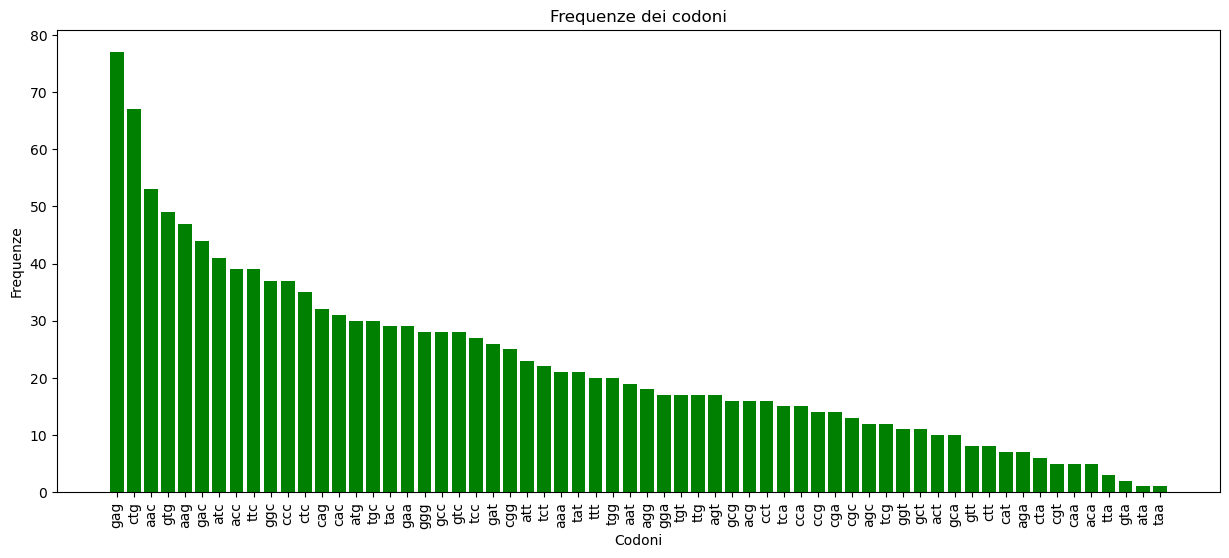

In [110]:
plt.figure(figsize = (15, 6))

plt.bar(sorted_codon_list, codon_freq_list, color = 'green')

plt.title('Frequenze dei codoni')
plt.xlabel('Codoni')
plt.ylabel('Frequenze')
plt.xticks(rotation = 90)

plt.show()

### Diagramma degli amminoacidi

Creare la lista dei simboli di amminoacido (asse x del diagramma)

In [111]:
ammino_acid_list = [t[0] for t in ammino_frequencies]

In [112]:
ammino_acid_list

['L',
 'E',
 'S',
 'G',
 'V',
 'R',
 'P',
 'N',
 'T',
 'D',
 'K',
 'A',
 'I',
 'F',
 'Y',
 'C',
 'H',
 'Q',
 'M',
 'W']

Creare la corrispondente lista delle frequenze (asse y del diagramma)

In [114]:
aa_freq_list = [t[1] for t in ammino_frequencies]

In [115]:
aa_freq_list

[136,
 106,
 105,
 93,
 87,
 82,
 82,
 72,
 70,
 70,
 68,
 65,
 65,
 59,
 50,
 47,
 38,
 37,
 30,
 20]

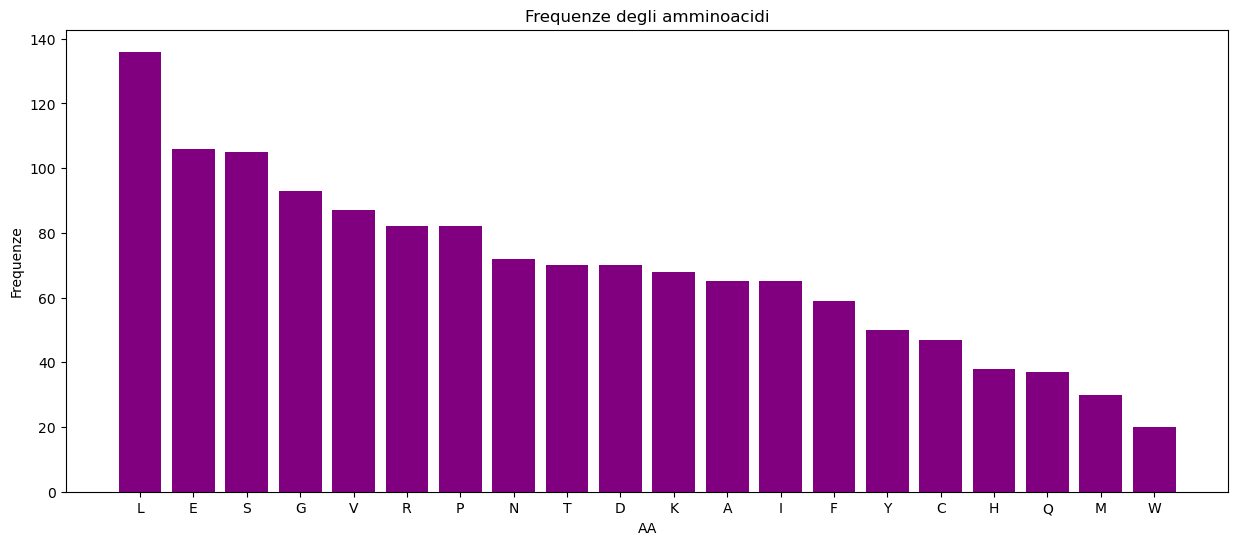

In [116]:
plt.figure(figsize = (15, 6))

plt.bar(ammino_acid_list, aa_freq_list, color = 'purple')

plt.title('Frequenze degli amminoacidi')
plt.xlabel('AA')
plt.ylabel('Frequenze')

plt.show()

## Validare la sequenza della proteina letta dall'*entry*

a) Tradurre in proteina la sequenza della CDS.

Alternativa 1

In [124]:
cds_translation = ''
for i in range(0,len(cds_sequence)-3,3):
    cds_translation = cds_translation + genetic_code_dict[cds_sequence[i:i+3]]

Alternativa 2

In [151]:
cds_translation = ''.join(genetic_code_dict[codon] for codon in codon_list[:-1])

Alternativa 3

In [152]:
cds_translation = re.sub(r'.{3}', lambda x : genetic_code_dict[x.group()], cds_sequence[:-3])

In [153]:
cds_translation

'MGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFLRKRQPDGPLGPLYASSNPEY

b) Verificare infine che la proteina letta dal file `EMBL` è uguale a quella ottenuta per traduzione della CDS.

In [136]:
cds_translation == protein_sequence

True

## Trovare una CDS "sinonima" della precedente ottenuta sostituendo il maggior numero di codoni

a) Costruire il dizionario inverso del codice genetico:

- **chiave**: simbolo di amminoacido
- **valore**: lista dei codoni che corrispondono all'amminoacido

In [141]:
inverse_genetic_code_dict = dict((l[0], l[1:]) for l in split_genetic_code)

In [142]:
inverse_genetic_code_dict

{'A': ['gct', 'gcc', 'gca', 'gcg'],
 'C': ['tgt', 'tgc'],
 'D': ['gat', 'gac'],
 'E': ['gaa', 'gag'],
 'F': ['ttt', 'ttc'],
 'G': ['ggt', 'ggc', 'gga', 'ggg'],
 'H': ['cat', 'cac'],
 'I': ['att', 'atc', 'ata'],
 'K': ['aaa', 'aag'],
 'L': ['tta', 'ttg', 'ctt', 'ctc', 'cta', 'ctg'],
 'M': ['atg'],
 'N': ['aat', 'aac'],
 'P': ['cct', 'ccc', 'cca', 'ccg'],
 'Q': ['caa', 'cag'],
 'R': ['cgt', 'cgc', 'cga', 'cgg', 'aga', 'agg'],
 'S': ['tct', 'tcc', 'tca', 'tcg', 'agt', 'agc'],
 'T': ['act', 'acc', 'aca', 'acg'],
 'V': ['gtt', 'gtc', 'gta', 'gtg'],
 'W': ['tgg'],
 'Y': ['tat', 'tac'],
 's': ['tga', 'taa', 'tag']}

b) Determinare una CDS sinonima sostituendo il maggior numero possibile di codoni.

In [143]:
syn_cds_sequence = ''

for codon in codon_list:
    aa = genetic_code_dict[codon]
    copy_list = list(inverse_genetic_code_dict[aa])
    if len(copy_list) > 1:
        copy_list.remove(codon)
        
    new_codon = copy_list.pop(0)
    
    syn_cds_sequence = syn_cds_sequence + new_codon

In [144]:
syn_cds_sequence

'atgggtactggtggtcgtcgtggtgctgctgctgctcctttattagttgctgttgctgctttattattaggtgctgctggtcatttatatcctggtgaagtttgccctggtatggacattcgtaataatttaacccgtttacacgaattagaaaactgttccgttattgagggtcatttacaaattttattaatgtttaagactcgtcctgaggactttcgtgatttatcttttcctaagttaattatgattaccgactatttattattatttcgtgtttacggtttagaatctttaaaagatttatttcctaatttaactgttattcgtggttctcgtttatttttcaattatgctttagttatttttgaaatggtccatttaaaagagttaggtttatataatttaatgaatattactcgtggctccgttcgtattgaaaaaaataacgaattatgctatttagctaccattgattggtctcgcattttagactctgttgaagacaaccatattgttttaaataaggacgataatgaagaatgcggtgatatttgccctggcactgctaaaggtaaaactaattgtcctgctactgttattaatggtcaattcgttgagcgttgctggacccactctcattgtcaaaaggtctgtcctactatttgcaaatctcatggttgtactgctgagggtttatgctgtcattctgaatgtttaggtaattgctcccaacctgatgatcctactaaatgtgttgcttgtcgtaatttttatttagatggtcgttgcgttgaaacttgtcctcctccttattatcattttcaagattggcgttgcgttaatttttctttttgtcaagatttacatcataagtgtaaaaattctcgtcgtcaaggttgtcatcagtatgttatccataataataaatgtattcccgaatgcccttctggttatactatgaactcttctaatttattatgtactccttgtttaggc

c) Verificare che fornisca la stessa proteina.

In [145]:
cds_translation == re.sub(r'.{3}', lambda x : genetic_code_dict[x.group()], syn_cds_sequence[:-3])

True

d) Misurare la differenza con la precedente CDS tramite distanza di Hamming, che è il numero di posizioni in cui le due sequenze hanno diverso carattere.

**Esempio**: la distanza di Hamming di `ACGTG` e `GCTTG` è pari a 2, in quanto le basi diverse sono quelle in posizione 1 (`A` e `G`) e quelle in posizione 3 (`G` e `T`).

In [148]:
hamming_dist = [cds_sequence[i] != syn_cds_sequence[i] for i in range(len(cds_sequence))].count(True)

Percentuale di basi differenti rispetto alla lunghezza delle due CDS:

In [149]:
hamming_dist / len(cds_sequence)

0.36370209689081706

Numero di possibili CDS che esprimono la stessa proteina.

In [150]:
count = 1
for aa in cds_translation:
    count = count * len(inverse_genetic_code_dict[aa])
    
count

108882884128409166024746492002735855651428001792320127244126386647029980632289513784045044140581393841618827221748361594073355650045240363812106073841182979165897587490232446777783983313880563133730376849029385911803929480037903720952494698441685495017262385109095191569323097956789003231766319113433010022112570580209761930707000543314601534394699157328283463123684349487972283113201441194551015153866798709856868536638771549717606971376688439270202789826226688266419863942529413908709032123007393702560744391321515523540532123485323124014154147380386166265468444631304419682081513203797302729799078430988163220003146226946076604133339594066640842997415150550171343877731740457868722176